# 5 Flower Types-Classification

<img src='Flower.jpg'>

In [93]:
# Data link: https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset

In [3]:
import tensorflow as tf
import cv2
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [5]:
os.listdir('flower_images/')

['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

In [7]:
labels=['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']
img_path='flower_images/'

In [13]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [15]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [17]:
df.head()

,img,label
0,flower_images/Lilly/00048a5c76.jpg,Lilly
1,flower_images/Lilly/001ff6644e.jpg,Lilly
2,flower_images/Lilly/001ff6656j.jpg,Lilly
3,flower_images/Lilly/00973ad1b1.jpg,Lilly
4,flower_images/Lilly/00a7d512d6.jpg,Lilly


In [19]:
df.shape

(5000, 2)

In [21]:
label_encoder=LabelEncoder()

In [23]:
df['encode_label']=LabelEncoder().fit_transform(df['label'])

In [25]:
df.sample(5)

,img,label,encode_label
1095,flower_images/Lotus/176fd7b2a4.jpg,Lotus,1
4044,flower_images/Tulip/0abfa5bbad.jpg,Tulip,4
772,flower_images/Lilly/c2957bfb85.jpg,Lilly,0
1715,flower_images/Lotus/b9c65af4f9.jpg,Lotus,1
4070,flower_images/Tulip/113256e462.jpg,Tulip,4


In [27]:
x=[]
for img_path in df['img']:
    img=cv2.imread(img_path)
    img=cv2.resize(img,(170,170))
    img=img/255.0
    x.append(img)

In [29]:
x=np.array(x)

In [41]:
x

array([[[[0.17254902, 0.20392157, 0.23137255],
         [0.17254902, 0.20392157, 0.23137255],
         [0.17647059, 0.20784314, 0.23529412],
         ...,
         [0.20784314, 0.23529412, 0.25882353],
         [0.2       , 0.21568627, 0.23529412],
         [0.18823529, 0.2       , 0.21568627]],

        [[0.17254902, 0.20392157, 0.23137255],
         [0.17647059, 0.20784314, 0.23529412],
         [0.18039216, 0.20784314, 0.23529412],
         ...,
         [0.20392157, 0.23137255, 0.25490196],
         [0.2       , 0.21568627, 0.23529412],
         [0.18823529, 0.2       , 0.21568627]],

        [[0.17647059, 0.20784314, 0.23529412],
         [0.17647059, 0.20784314, 0.23529412],
         [0.18039216, 0.21176471, 0.23921569],
         ...,
         [0.19607843, 0.22352941, 0.25098039],
         [0.19215686, 0.20784314, 0.22745098],
         [0.18431373, 0.19607843, 0.21176471]],

        ...,

        [[0.19607843, 0.23529412, 0.23529412],
         [0.19215686, 0.22352941, 0.23921569]

In [33]:
y=df['encode_label']

In [45]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    4
4996    4
4997    4
4998    4
4999    4
Name: encode_label, Length: 5000, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=42)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 170, 170, 3)
(1000, 170, 170, 3)
(4000,)
(1000,)


## Data Visualization

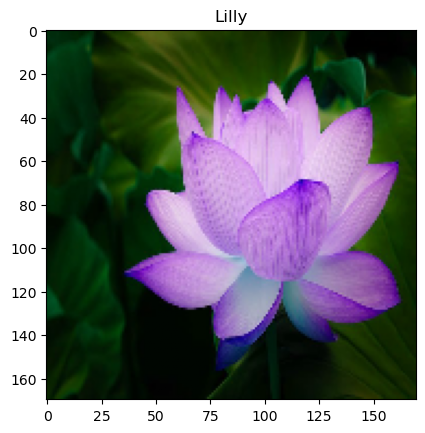

In [52]:
plt.imshow(x_train[500])
plt.title(labels[int(y_train[500])]);

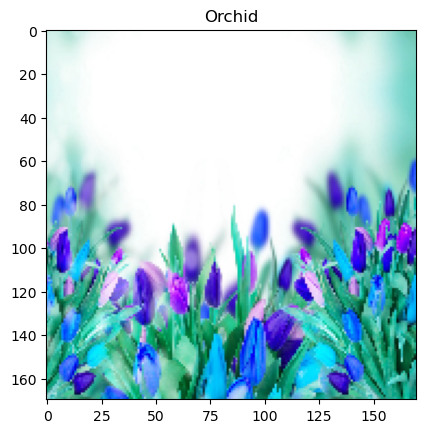

In [54]:
plt.imshow(x_train[2000])
plt.title(labels[int(y_train[2000])]);

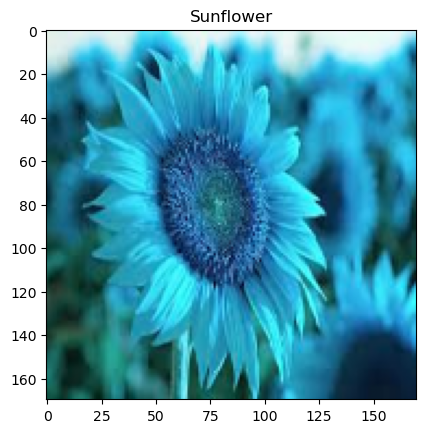

In [56]:
plt.imshow(x_train[3500])
plt.title(labels[int(y_train[3500])]);

## CNN Convolutional Neural Networks

In [59]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
model=Sequential()
model.add(Input(shape=(170,170,3)))

model.add(Conv2D(100,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(80,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(60,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(50,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(30,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(10,kernel_size=(3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
from keras.utils import to_categorical

In [85]:
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

In [87]:
history=model.fit(x_train, y_train_encoded, validation_data=(x_test, y_test_encoded), epochs=20, verbose=1)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 86s 665ms/step - accuracy: 0.2893 - loss: 1.5041 - val_accuracy: 0.4730 - val_loss: 1.2276
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 94s 750ms/step - accuracy: 0.4835 - loss: 1.2198 - val_accuracy: 0.5000 - val_loss: 1.2030
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 107s 856ms/step - accuracy: 0.5323 - loss: 1.1340 - val_accuracy: 0.5680 - val_loss: 1.0612
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 893ms/step - accuracy: 0.5575 - loss: 1.0646 - val_accuracy: 0.5820 - val_loss: 0.9995
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 108s 865ms/step - accuracy: 0.5961 - loss: 0.9866 - val_accuracy: 0.6120 - val_loss: 0.9636
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 117s 933ms/step - accuracy: 0.6478 - loss: 0.8943 - val_accuracy: 0.6600 - val_loss: 0.8824
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 98s 785ms/step - accuracy: 0.6691 - loss: 0.8538 - val_accuracy: 0.6790 - val_loss: 0.8483
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 91s 728ms/step - accuracy: 0.7003 - los

In [89]:
model.save('flower_classification.h5')

In [91]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 168, 168, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 84, 84, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 82, 82, 80)          │          72,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 41, 41, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 39, 39, 60)          │          43,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 19, 19, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 17, 17, 50)          │          27,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 8, 8, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 6, 6, 30)            │          13,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 3, 3, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 1, 1, 10)            │           2,710 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 490,451 (1.87 MB)

 Trainable params: 163,483 (638.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 326,968 (1.25 MB)

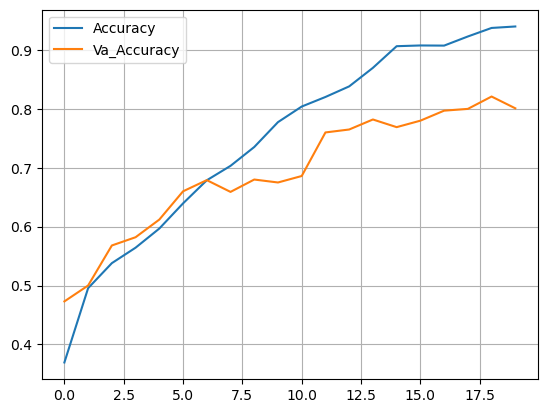

In [95]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Va_Accuracy')
plt.grid()
plt.legend()

In [99]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step


In [103]:
confusion_matrix(y_pred,y_test)

array([[131,   5,  13,   3,   8],
       [ 26, 162,   8,   2,  10],
       [ 33,  11, 155,   1,  13],
       [  5,   2,   1, 199,   7],
       [ 21,  10,  15,   5, 154]])

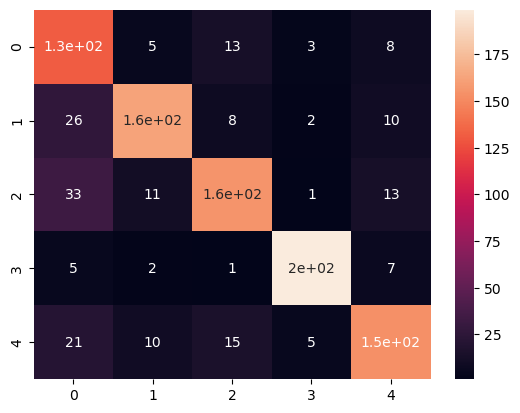

In [105]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True);

In [107]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.61      0.82      0.70       160
           1       0.85      0.78      0.81       208
           2       0.81      0.73      0.77       213
           3       0.95      0.93      0.94       214
           4       0.80      0.75      0.78       205

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.81      0.80      0.80      1000



## Transfer Learning

In [110]:
from tensorflow.keras.applications import ResNet50, InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## ResNet50

In [129]:
data_dir='flower_images/'
img_width,img_height=224,224

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='categorical',subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)

test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='categorical',subset='validation')

base_model=ResNet50(weights='imagenet',input_shape=(img_width,img_height,3),include_top=False)
model=Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainabel=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_datagenerator,epochs=5, validation_data=test_datagenerator)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 888s 7s/step - accuracy: 0.4896 - loss: 14.6452 - val_accuracy: 0.2000 - val_loss: 2.0974
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 838s 7s/step - accuracy: 0.8107 - loss: 0.5868 - val_accuracy: 0.2010 - val_loss: 1.6280
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 894s 7s/step - accuracy: 0.9278 - loss: 0.2307 - val_accuracy: 0.1860 - val_loss: 1.6114
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 749s 6s/step - accuracy: 0.9623 - loss: 0.1138 - val_accuracy: 0.1890 - val_loss: 1.6753
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 4232s 34s/step - accuracy: 0.9772 - loss: 0.0848 - val_accuracy: 0.3190 - val_loss: 1.6083


In [131]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,956,689 (1.41 GB)

 Trainable params: 126,301,189 (481.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 252,602,380 (963.60 MB)